<a href="https://colab.research.google.com/github/shanaam/teamA-grebes-NMA2020/blob/master/SM/200723_sm_nma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
#@title Data retrieval amd loading
import os, requests

fname = "stringer_spontaneous.npy"
url = "https://osf.io/dpqaj/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

import numpy as np
dat = np.load('stringer_spontaneous.npy', allow_pickle=True).item()
print(dat.keys())

dict_keys(['sresp', 'run', 'beh_svd_time', 'beh_svd_mask', 'stat', 'pupilArea', 'pupilCOM', 'xyz'])


In [120]:
print(dat['sresp'].shape)
print(len(dat['stat']))
print((dat['stat'][19].dtype))
print(dat['stat'][19]['med'])

(11983, 7018)
11983
[('ipix', 'O'), ('ypix', 'O'), ('xpix', 'O'), ('lam', 'O'), ('lambda', 'O'), ('npix', 'O'), ('med', 'O'), ('neuropilCoefficient', 'O'), ('baseline', 'O'), ('footprint', 'O'), ('mrs', 'O'), ('mrs0', 'O'), ('cmpct', 'O'), ('aspect_ratio', 'O'), ('ellipse', 'O'), ('mimgProj', 'O'), ('mimgProjAbs', 'O'), ('isoverlap', 'O'), ('radius', 'O'), ('ipix_neuropil', 'O'), ('dFstat', 'O'), ('skew', 'O'), ('std', 'O'), ('maxMinusMed', 'O'), ('top5pcMinusMed', 'O'), ('blockstarts', 'O'), ('iplane', 'O'), ('iscell', 'O'), ('noiseLevel', 'O')]
[array([[191.5,  23. ]])]


In [121]:
#@title import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [122]:
num_cells,num_times = dat['sresp'].shape
run = np.squeeze(dat['run'])
sresp = dat['sresp']

[Text(0, 0.5, 'Ca2+ Activity'), Text(0.5, 0, 'Time')]

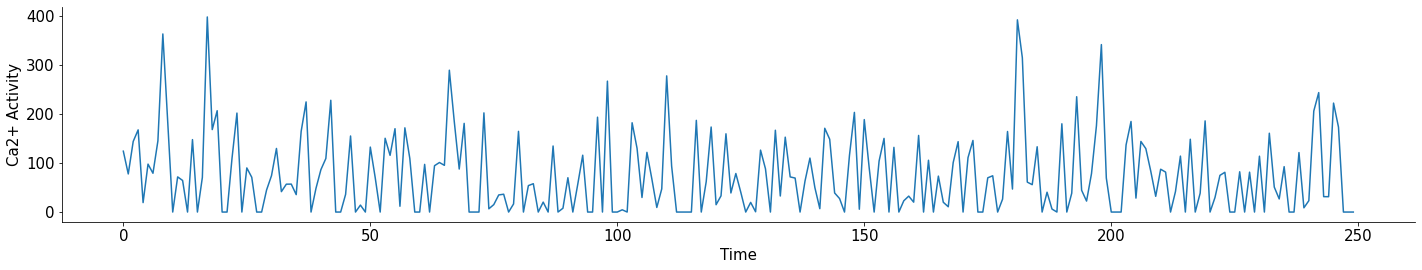

In [123]:
neuron_idx = 134
stop_len = 250
plt.plot(sresp[neuron_idx,:stop_len])
ax = plt.gca()
ax.set(
  xlabel="Time",
  ylabel="Ca2+ Activity",
)

[Text(0, 0.5, 'Running Speed [a.u.]'), Text(0.5, 0, 'Time')]

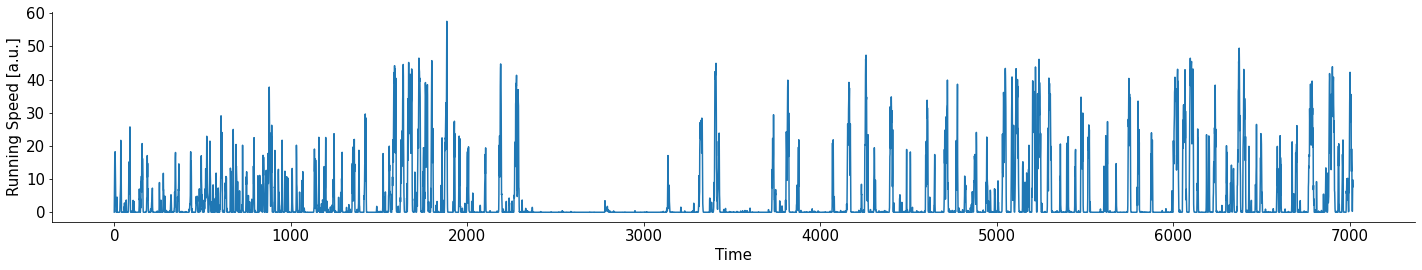

In [124]:
plt.plot(run[:])
ax = plt.gca()
ax.set(
  xlabel="Time",
  ylabel="Running Speed [a.u.]",
)

## serialize running speed

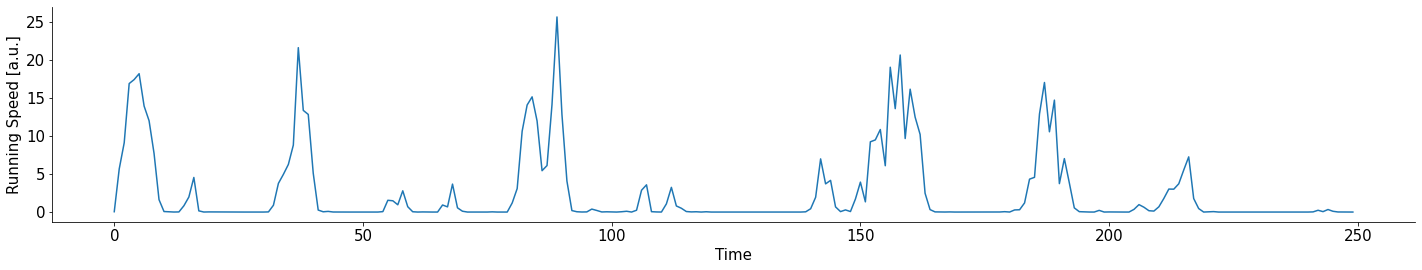

In [125]:
plt.plot(run[:stop_len])

t = np.arange(stop_len)

ax = plt.gca()
ax.set(
  xlabel="Time",
  ylabel="Running Speed [a.u.]",
)
plt.show()

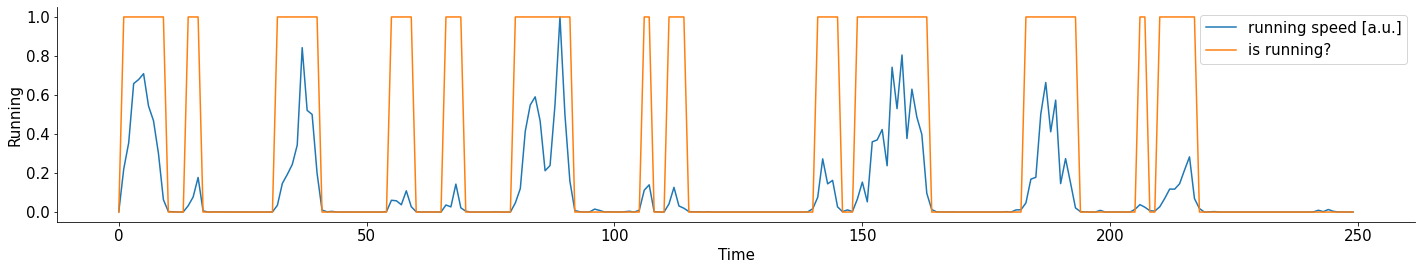

In [126]:
run_thres = 0.5 #cut-off threhold for running speed to be considered running [a.u.]

#function to detm if running
def is_running(x):
  if x >= run_thres:
    return 1
  else:
    return 0

# map the above funtion to our run
is_run = np.array([is_running(xi) for xi in run])

#plot
plt.plot(run[:stop_len]/ max(run[:stop_len]), label = "running speed [a.u.]")
plt.plot(is_run[:stop_len], label = "is running?")
plt.xlabel("Time")
plt.ylabel("Running")
plt.legend()
plt.show()

## index starting points

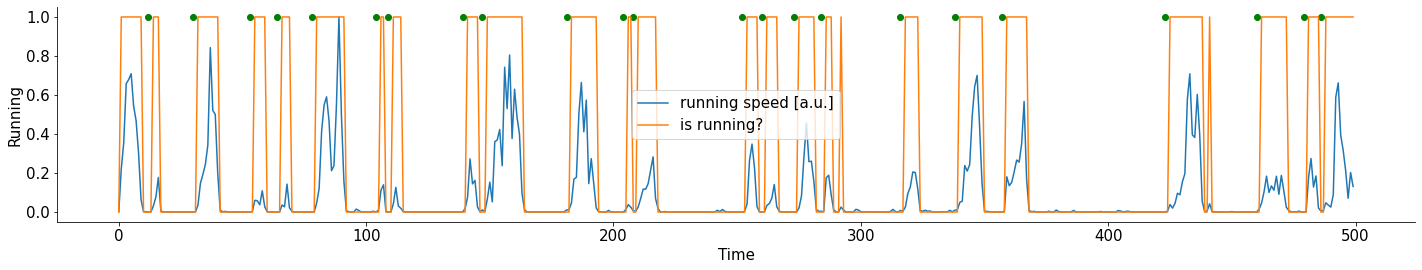

In [177]:
stop_len = 500
searchval = [0,0,1,1]

idx = [np.s_[i:len(is_run) - len(searchval) +1+i] for i in range(len(searchval))]

x = [is_run[idx[i]] == searchval[i] for i in range(n)]

x = np.all(x, axis=0)

run_starts = np.where(x)[0]

#plot
plt.plot(run[:stop_len]/ max(run[:stop_len]), label = "running speed [a.u.]")
plt.plot(is_run[:stop_len], label = "is running?")
plt.scatter(run_starts[run_starts < stop_len], np.repeat(1, len(run_starts[run_starts < stop_len])), color = "green")
plt.xlabel("Time")
plt.ylabel("Running")
plt.legend()
plt.show()


## splice (TODO: normalize, make this a function)

In [169]:
# given an array, get a vector
neuron = sresp[neuron_idx,:]

neur_grid = []

for start in run_starts:
  x = neur[start-3:start+4]
  neur_grid.append(x)

neur_grid = np.stack(neur_grid, axis=0)

mean_activity = np.mean(neur_grid, axis=0)

print(mean_activity)


(205, 7)
[72.92701  74.36615  72.06527  75.37049  68.950165 87.99387  71.77153 ]


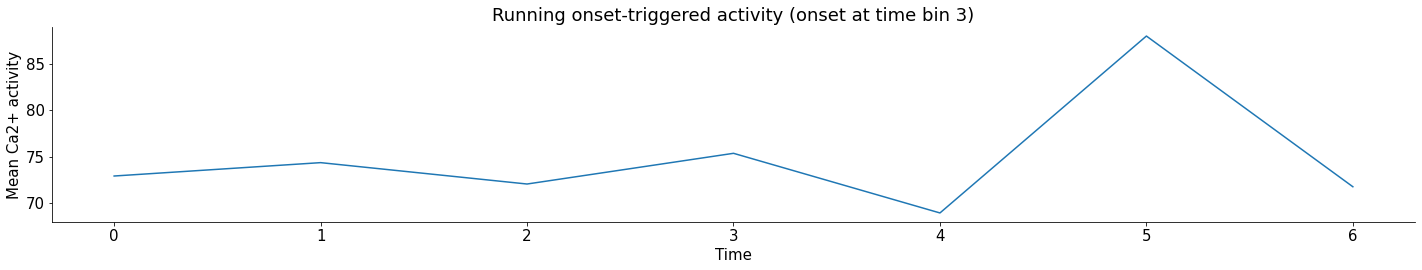

In [172]:
# plot mean activity
# CONFINT??? st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))

plt.plot(mean_activity)
plt.title("Running onset-triggered activity (onset at time bin 3)")
plt.xlabel("Time")
plt.ylabel("Mean Ca2+ activity")
plt.show()

